In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
%matplotlib inline


data_dir = '/data/reddylab/Revathy/dev/rna-seq_Siklenka/results/rna_seq/differential_testing/deseq2/timeseries'
special_genes = ['Maf', 'Il17a', 'Rorc', 'Stat3', 'Stat5', 'Batf', 'Irf4', 'Runx1', 'Il21r', 'Tbx21', 'Foxp3']
files = [
     'Th17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'Th17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'Th17.Bulk.16hr_vs_mmTh0.Bulk.16hr',
     'Th17.Bulk.24hr_vs_mmTh0.Bulk.24hr',
     'Th17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'Th17.Bulk.72hr_vs_mmTh0.Bulk.72hr',
     'pTh17.Bulk.00hr_vs_mmTh0.Bulk.00hr', 
     'pTh17.Bulk.02hr_vs_mmTh0.Bulk.02hr',
     'pTh17.Bulk.16hr_vs_mmTh0.Bulk.16hr', 
     'pTh17.Bulk.24hr_vs_mmTh0.Bulk.24hr',  
     'pTh17.Bulk.48hr_vs_mmTh0.Bulk.48hr',
     'pTh17.Bulk.72hr_vs_mmTh0.Bulk.72hr'
]

def clean_columns(f):
    return '.'.join(f.split('/')[-1].split('_')[:1])

df = None
for file in files:
    df_tmp = pd.read_csv("%s/%s.with_genes.txt" % (data_dir, file), sep="\t")
    if 'stat' in df_tmp.columns.tolist():
        df_tmp.drop(columns = ['Unnamed: 0', 'baseMean', 'lfcSE', 'pvalue', 'padj', 'GeneType', 'stat'], inplace = True)
    else:
        df_tmp.drop(columns = ['Unnamed: 0', 'baseMean', 'lfcSE', 'pvalue', 'padj', 'GeneType'], inplace = True)
    df_tmp = df_tmp[['GeneName', 'log2FoldChange']]
    df_tmp.columns = df_tmp.columns[:-1].tolist() + [clean_columns(file)]
    if df is None:
        df = df_tmp
    else:
        df = df.merge(df_tmp, how = 'outer', on = 'GeneName')
    df = df.fillna(0)

sig_genes = df[df.GeneName.isin(special_genes)]




,GeneName,Th17.Bulk.00hr,Th17.Bulk.02hr,Th17.Bulk.16hr,Th17.Bulk.24hr,Th17.Bulk.48hr,Th17.Bulk.72hr,pTh17.Bulk.00hr,pTh17.Bulk.02hr,pTh17.Bulk.16hr,pTh17.Bulk.24hr,pTh17.Bulk.48hr,pTh17.Bulk.72hr
1129,Il21r,-0.284801,-0.961864,0.034543,0.619151,-1.198285,-0.001107,-0.260233,-0.455851,0.805889,0.221400,-0.309821,-1.169458
1518,Batf,-0.435353,4.662978,2.472546,2.375066,0.814547,1.858909,-0.363088,4.291571,2.589034,1.998176,1.771867,0.640999
1880,Runx1,-0.281705,-0.379094,1.994341,0.830082,0.629648,-0.456449,-0.073585,-0.240691,1.362790,1.578827,0.201917,-0.107862
2521,Stat3,-0.194166,2.171118,2.046670,1.301206,0.798560,0.739327,-0.155949,2.429236,1.528817,1.936920,0.126937,0.464230
2820,Foxp3,-0.682860,-1.586489,1.858113,-5.780397,2.236775,-5.219106,-1.169128,-1.766791,-3.785739,0.529686,0.000000,-2.520902
4678,Irf4,-0.288634,0.505642,0.256108,-0.313683,0.644946,-1.192047,-0.229800,0.254849,-0.446884,0.326155,-0.697423,0.447665
8687,Maf,-0.122804,2.135291,9.775354,4.102267,9.241520,1.882360,-0.044736,2.258452,7.119973,8.189484,2.583459,7.321425
10431,Tbx21,0.000000,3.378511,3.699093,3.788794,1.375261,3.002453,0.000000,3.779803,5.871161,1.790901,3.071730,2.599733
10629,Rorc,0.000000,-1.363603,3.989625,1.685694,1.784552,-0.426922,0.000000,-1.439070,3.050521,2.827100,0.179149,0.698142
10887,Il17a,0.000000,0.000000,11.034698,11.399354,12.795124,8.005564,0.000000,0.000000,10.437342,12.767952,9.512024,10.064051


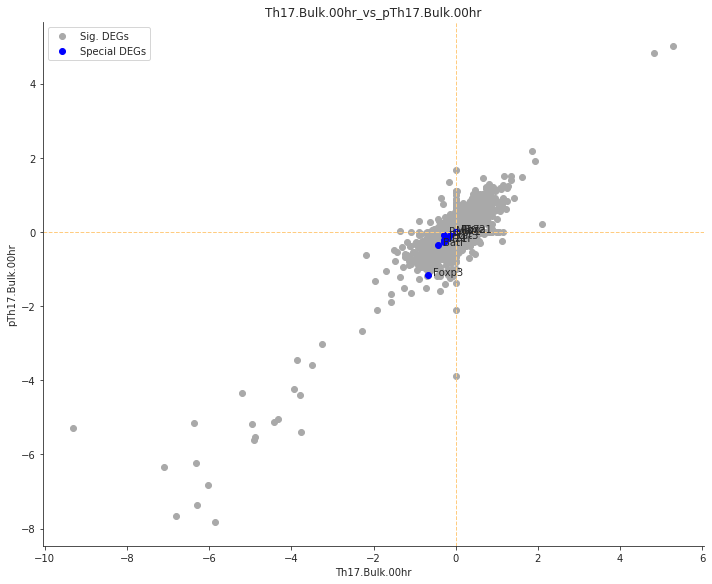

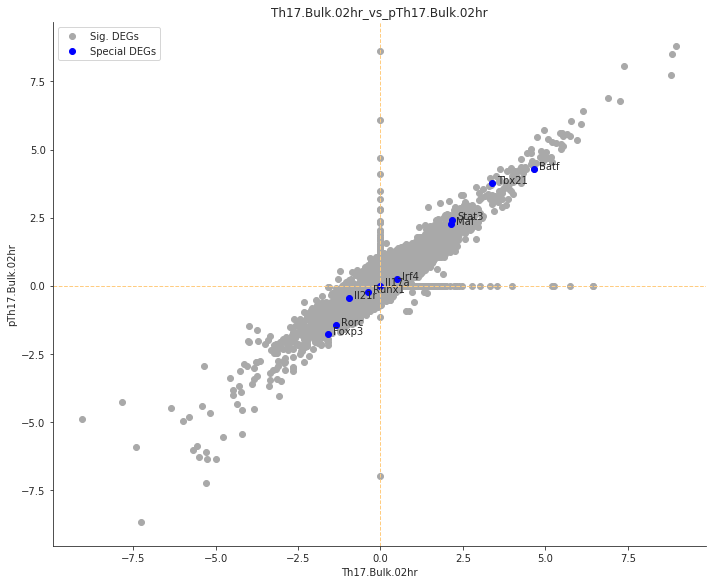

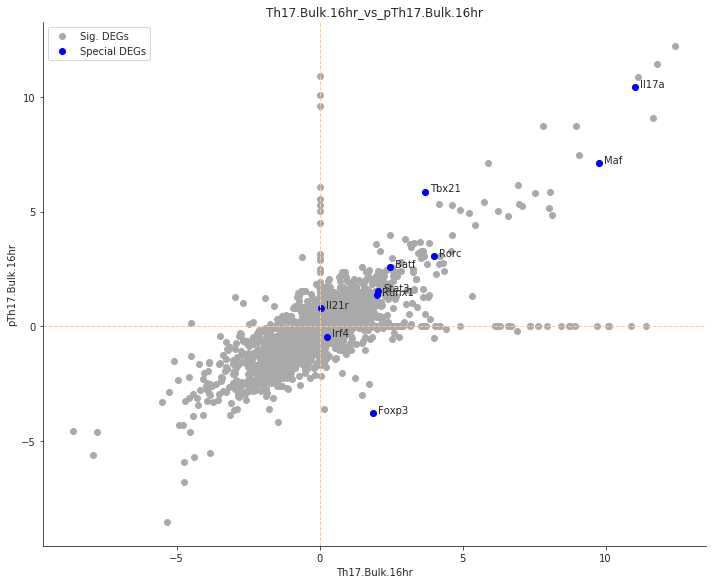

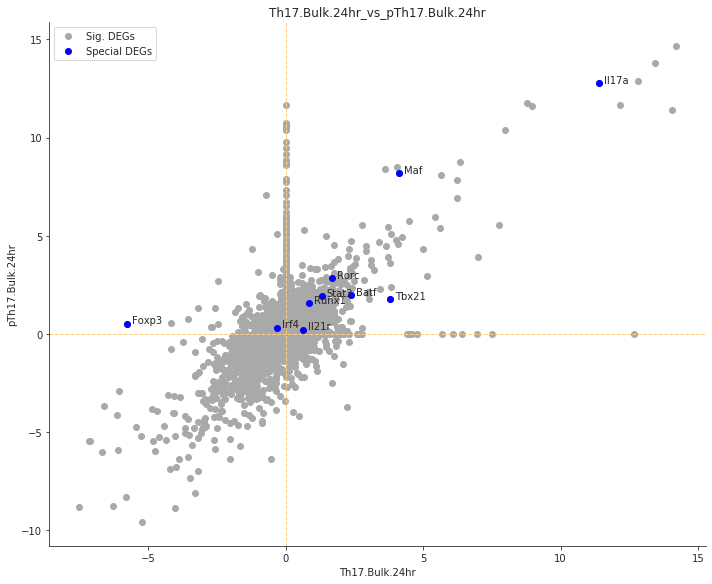

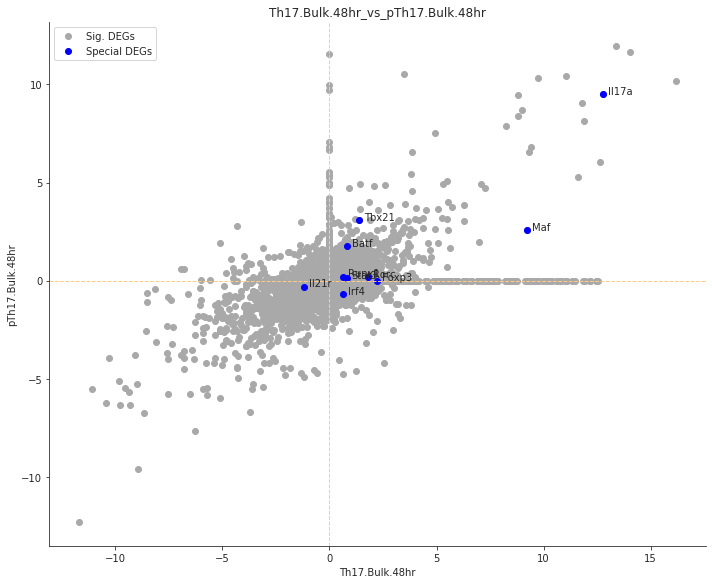

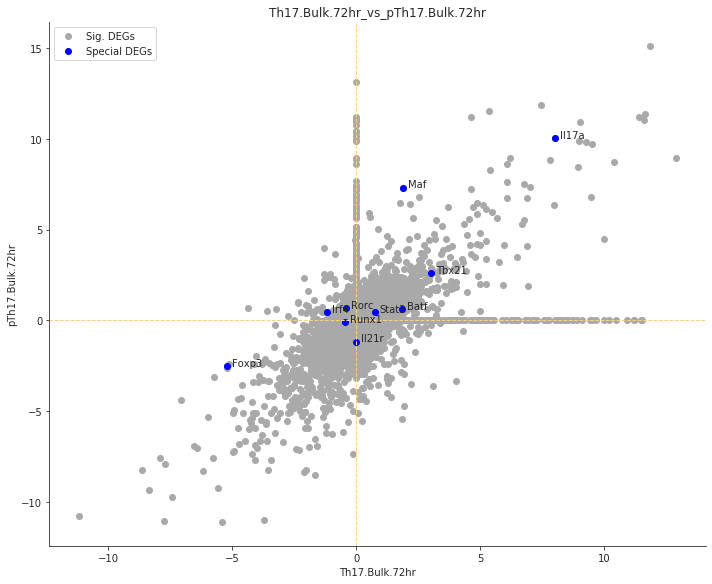

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
%matplotlib inline


#scatter plots for comparing Th17 and pTh17 for each time point

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

timepoints = ['00hr','02hr','16hr','24hr','48hr','72hr']

for time in timepoints:
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)

    ax.plot(df['Th17.Bulk.%s' % time].values, 
            df['pTh17.Bulk.%s' % time].values, 
            'o', color='darkgray', label='Sig. DEGs')
    for x, y, t in zip(sig_genes['Th17.Bulk.%s' % time].values,
                       sig_genes['pTh17.Bulk.%s' % time].values, 
                       sig_genes['GeneName'].values) :
        ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left',
                textcoords='offset points')

    ax.plot(sig_genes['Th17.Bulk.%s' % time].values, 
            sig_genes['pTh17.Bulk.%s' % time].values, 
            'o', color='blue', label='Special DEGs')

    plt.xlabel('Th17.Bulk.%s' % time)
    plt.ylabel('pTh17.Bulk.%s' % time)
    plt.legend()
    sns.despine(fig,ax)
    
    #simpleaxis(ax)
    plt.tight_layout()
    plt.title('Th17.Bulk.%s_vs_pTh17.Bulk.%s' % (time, time))

    plt.axhline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')
    plt.axvline(0, color='#ffcc80', linewidth = 1, linestyle = 'dashed')

    plt.show()
